# Aluno: Lucas Melo de Carvalho

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1ª Questão


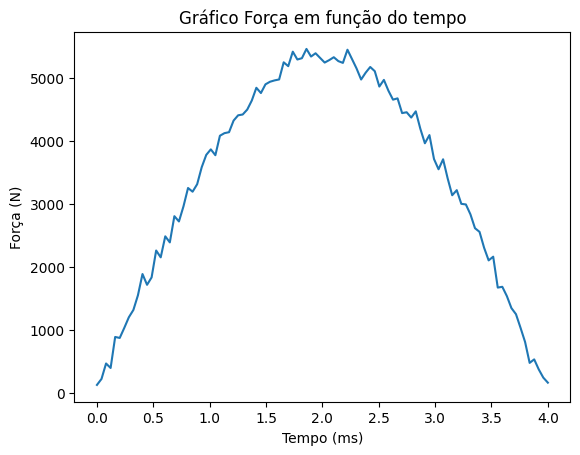

In [ ]:
#ler o arquivo e gerar um grafico força x tempo (com o tempo em ms)
df = np.loadtxt("Lucas Melo de Carvalho - dados_forca.txt")
F = df[:,1]
t = df[:,0]

#transformar os dados de tempo para ms
tmp = t*1000
'''
print(F)
print(t)
'''

#plotar gráfico Fxt
plt.plot(tmp,F)
plt.title("Gráfico Força em função do tempo")
plt.xlabel("Tempo (ms)")
plt.ylabel("Força (N)")
plt.show()

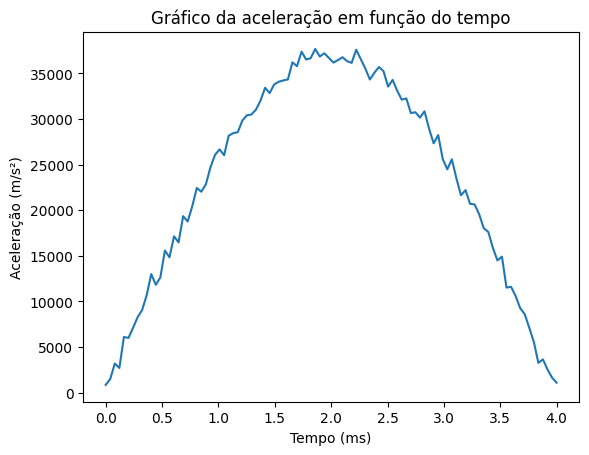

In [ ]:
#calcular aceleração da bola e fazer gráfico aceleração em função do tempo

# Da 2ª lei de Newton: F = ma => a = F/m
m = 0.145
a = F/m

plt.plot(tmp,a)
plt.title("Gráfico da aceleração em função do tempo")
plt.xlabel("Tempo (ms)")
plt.ylabel("Aceleração (m/s²)")
plt.show()

In [ ]:
#calcular o impulso da força
# usando a regra do trapézio para calcular a integral de F.t
I = np.trapz(F,t)
print(f'O impulso da força é {I} N.s')

O impulso da força é 13.611668396820125 N.s


In [ ]:
#f -> vetor a
#ti = t[0]
#tf = t[-1]
#v0 = -40.1 m/s
#N = t.size

#definir metodo de euler
def met_euler(a,t,v0,N):
  dt = (t[-1] - t[0])/(N-1)
  vp = np.zeros_like(a)
  vp[0] = v0

  for i in range(1,len(t)):
    vp[i] = vp[i-1] + a[i-1]*dt
  return vp


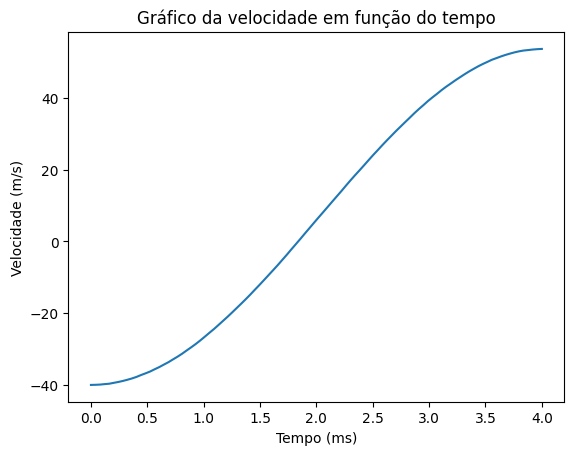

In [ ]:
#Encontrar a velocidade da bola e plotar grafico velocidade x tempo

v = met_euler(a,t,-40.1,t.size)

plt.plot(tmp,v)
plt.title("Gráfico da velocidade em função do tempo")
plt.xlabel("Tempo (ms)")
plt.ylabel("Velocidade (m/s)")
plt.show()

In [ ]:
#Qual velocidade da bola ao deixar o taco?
#é dada pela velocidade no último instante de tempo(perda de contato do taco com a bola)

print(f'Velocidade na perda do contato = {v[-1]} m/s')

Velocidade na perda do contato = 53.76858618739113 m/s


## 2ª Questão

In [ ]:
#definir regra de Simpson
def regra_simpson(f,a,b,N):
  h = (b-a)/N
  k = np.arange(1,(N/2)+1)
  I = (h/3)*(f(a)+f(b)+4*np.sum(f(a+(2*k-1)*h)) + 2*np.sum(f(a+2*(k[:-1])*h)))
  return I

In [ ]:
#Usar a regra de Simpson para calcular F com H = 30 m
f = lambda z: 200*(z/(5+z))*np.exp((-2*z)/30)
F = regra_simpson(f,0,30,10000)
print(f'F = {F} N')


F = 1480.5684800859 N


In [ ]:
#calcular a linha de ação da força dada pela expressão d
def integral_f(f,H,N):
  return regra_simpson(lambda z:f(z),0,H,N)

def integral_zf(f,H,N):
  return regra_simpson(lambda z:z*f(z),0,H,N)

def linha_acao(f,H,N):
  return integral_zf(f,H,N)/integral_f(f,H,N)

def f(z, H):
    return 200*(z/(5+z))*np.exp((-2*z)/H)

d = linha_acao(lambda z: f(z,30),30,10000)
print(f'd = {d} para H = 30')


d = 13.053698375036644 para H = 30


## 3ª Questão

Reescrevendo as equações como um sistema de EDOs de 1ª ordem:
\begin{align}
\frac{dx}{dt} &= v_x,  \\  
\frac{dv_x}{dt} &= -GM\frac{x}{r^2\sqrt{r^2+\frac{L^2}{4}}}, \\
\frac{dy}{dt} &= v_y, \\
\frac{dv_y}{dt} &= -GM\frac{y}{r^2\sqrt{r^2+\frac{L^2}{4}}} \\
\end{align}

Com isso definimos o vetor p com as 4 soluções $(x,v_x,y,v_y)$ e vamos resolver o sistema $\frac{dp}{dt} = F(p,t) $

In [29]:
#definir metodo rk4
def rk4(f,p0,ti,tf,N):
  p = p0
  h = (tf-ti)/N
  tp = np.arange(ti,tf+h,h)
  xp = []
  vxp = []
  yp = []
  vyp = []
  for t in tp:
    xp.append(p[0])
    vxp.append(p[1])
    yp.append(p[2])
    vyp.append(p[3])
    k1 = h*f(p,t)
    k2 = h*f(p + k1/2,t + h/2)
    k3 = h*f(p + k2/2, t + h/2)
    k4 = h*f(p + k3, t + h)
    p = p + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

  return xp,yp,vxp,vyp,tp

In [30]:
#Resolver numericamente as EDOs pelo método RK4
def F(p,t):
  G = 1
  M = 10
  L = 2

  x,vx,y,vy = p
  dx_dt = vx
  dy_dt = vy

  r = np.sqrt(x**2 + y**2)

  expr = (r**2)*np.sqrt((r**2) + (L**2)/4)
  dvx_dt = -G*M*x/expr
  dvy_dt = -G*M*y/expr

  return np.array([dx_dt,dvx_dt,dy_dt,dvy_dt])

x0 = 1
y0 = 0
vx0 = 0
vy0 = 1

p0 = np.array([x0,vx0,y0,vy0])

x,vx,y,vy,t = rk4(F,p0,0,10,1000)

x = np.array(x)
y = np.array(y)
t = np.array(t)

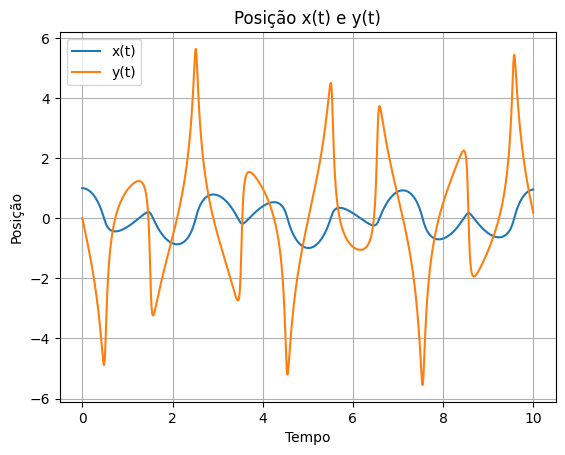

In [31]:
#plotar o gráfico das soluções x(t) e (y(t))

plt.plot(t,x)
plt.plot(t,y)
plt.title("Posição x(t) e y(t)")
plt.xlabel("Tempo")
plt.ylabel("Posição")
plt.legend(["x(t)","y(t)"])
plt.grid()
plt.show()

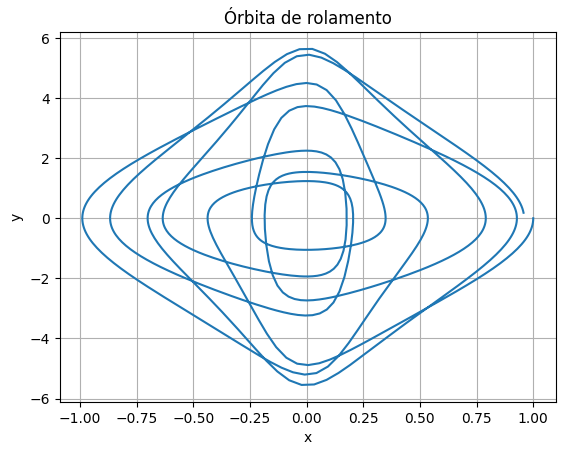

In [32]:
#gráfico da órbita de rolamento: y versus x

plt.plot(x,y)
plt.title("Órbita de rolamento")
plt.xlabel("Posição x")
plt.ylabel("Posição y")
plt.grid()
plt.show()

Como semelhanças entre a órbita de rolamento e a órbita de um planeta ao redor do Sol temos que ambas órbitas são fechadas em torno de um ponto central e, em ambos os casos,há uma força central que atua na direção do centro da órbita. Porém a natureza desta força central é diferente, pois depende de uma expressão mais complexa que a da gravidade (a órbita de rolamento depende inversamente de um parâmetro L).